# Analysis of Westbound Traffic on the I-94 Interstate Highway

This project focuses on analyzing westbound traffic patterns on the I-94 Interstate highway. The dataset contains information on traffic volume, weather conditions, and other factors that might influence traffic flow. By exploring these variables, I aim to uncover insights into the factors that most significantly affect traffic levels.

The primary goal of this analysis is to identify trends and patterns that can inform better traffic management strategies. By understanding the key contributors to traffic fluctuations, I can draw actionable conclusions to improve road efficiency and safety.


In [30]:
import pandas as pd

interstate = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
interstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <BarContainer object of 10 artists>)

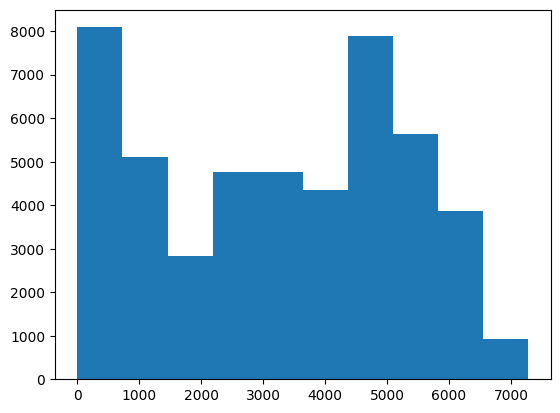

In [32]:
plt.hist(interstate['traffic_volume'])

In [33]:
interstate['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Analyzing Traffic Volume by Time of Day  

At this stage of the analysis, the data has been divided into two parts: nighttime (7 PM to 7 AM) and daytime (7 AM to 7 PM). This segmentation allows for a clearer comparison of traffic patterns based on the time of day. By examining these two periods separately, the analysis aims to determine whether traffic volume exhibits noticeable trends depending on the hour range.  

The next step involves exploring potential differences between daytime and nighttime traffic to identify any significant patterns or contributing factors.  


In [34]:
interstate['date_time'] = pd.to_datetime(interstate['date_time'])

In [35]:
day = interstate[(interstate['date_time'].dt.hour >= 7) & (interstate['date_time'].dt.hour < 19)]

In [36]:
night = interstate[(interstate['date_time'].dt.hour < 7) | (interstate['date_time'].dt.hour >= 19)]

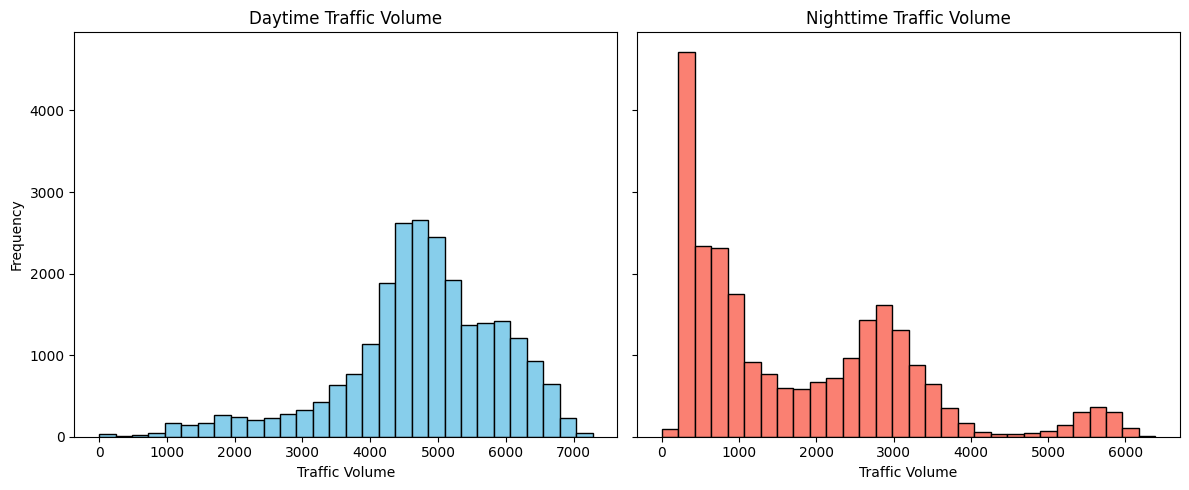

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(day['traffic_volume'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Daytime Traffic Volume')
axes[0].set_xlabel('Traffic Volume')
axes[0].set_ylabel('Frequency')

axes[1].hist(night['traffic_volume'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Nighttime Traffic Volume')
axes[1].set_xlabel('Traffic Volume')

plt.tight_layout()
plt.show()

In [38]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [39]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [41]:
day.loc[:, 'month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

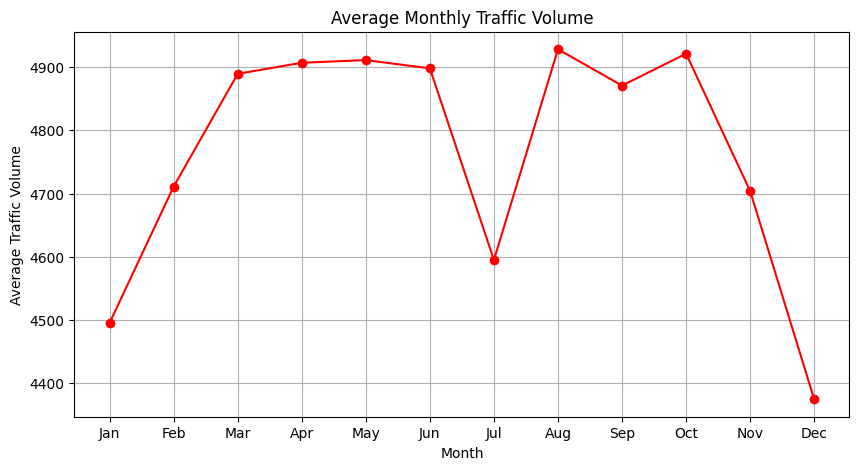

In [42]:
by_month['traffic_volume'].plot(kind='line', marker ='o', figsize=(10, 5), color='red')

plt.title('Average Monthly Traffic Volume')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [44]:
day.loc[:, 'dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']  

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

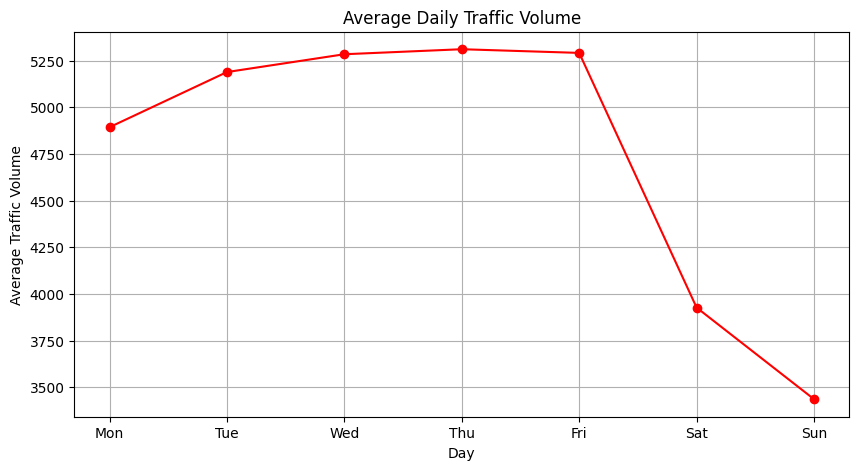

In [45]:
by_dayofweek['traffic_volume'].plot(kind='line', marker ='o', figsize=(10, 5), color='red')

plt.title('Average Daily Traffic Volume')
plt.xlabel('Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 
                                       'Sun'])
plt.grid(True)
plt.show()

In [47]:
day.loc[:, 'hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


## Traffic Volume: Business Days vs. Weekends  

The analysis of traffic volume across different hours of the day reveals a significant difference between business days and weekends. Traffic volume is consistently higher on business days compared to weekends, indicating increased road usage during the workweek.  

For instance, during business days, peak traffic volume occurs at 7 AM with an average of approximately 6,030 vehicles, while the same hour on weekends sees only around 1,589 vehicles. A similar trend continues throughout the day, with business day traffic remaining substantially higher than weekend traffic across all hours analyzed.  

This pattern suggests that weekday traffic is primarily driven by work commutes and other business-related activities, whereas weekends experience reduced road congestion.  


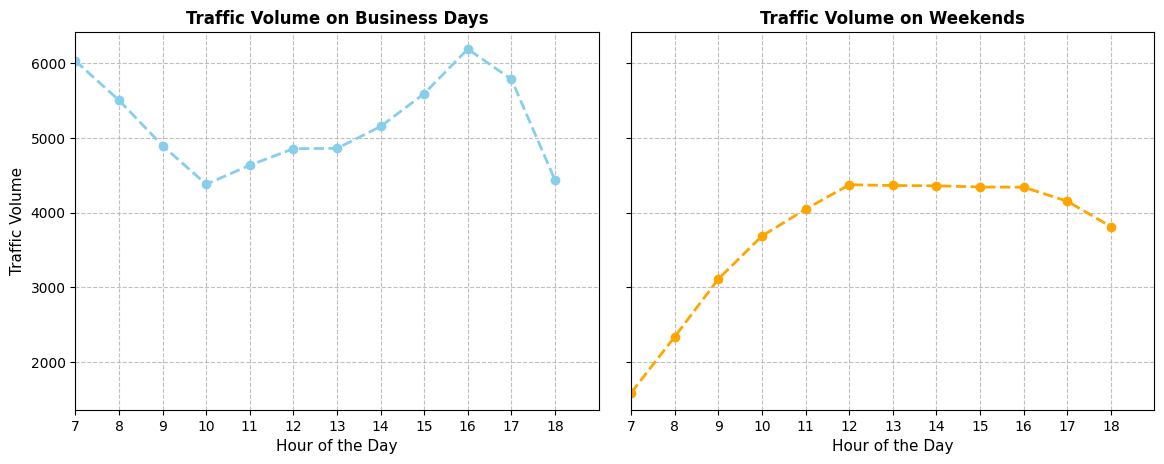

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

axes[0].plot(by_hour_business['traffic_volume'], color='skyblue', marker='o', linestyle='--', linewidth=2)
axes[0].set_title('Traffic Volume on Business Days', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Hour of the Day', fontsize=11)
axes[0].set_ylabel('Traffic Volume', fontsize=11)
axes[0].set_xlim(7, 19)  
axes[0].set_xticks(range(7, 19))  
axes[0].grid(True, linestyle='--', alpha=0.8)  

axes[1].plot(by_hour_weekend['traffic_volume'], color='orange', marker='o', linestyle='--', linewidth=2)
axes[1].set_title('Traffic Volume on Weekends', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Hour of the Day', fontsize=11)
axes[1].set_xlim(7, 19)  
axes[1].set_xticks(range(7, 19))  
axes[1].grid(True, linestyle='--', alpha=0.8)  

plt.tight_layout(pad=2) 
plt.show()

In [49]:
by_hour_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 7 to 18
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            12 non-null     float64
 1   rain_1h         12 non-null     float64
 2   snow_1h         12 non-null     float64
 3   clouds_all      12 non-null     float64
 4   traffic_volume  12 non-null     float64
 5   month           12 non-null     float64
 6   dayofweek       12 non-null     float64
dtypes: float64(7)
memory usage: 720.0 bytes


In [50]:
correlation = by_hour_business['temp'].corr(by_hour_business['traffic_volume'])
print("correlation between temperature and traffic volume is ", correlation)

correlation between temperature and traffic volume is  0.015381408056326592


In [51]:
correlation = by_hour_business['rain_1h'].corr(by_hour_business['traffic_volume'])
print("correlation between rain and traffic volume is ", correlation)

correlation between rain and traffic volume is  0.30370115363847733


In [52]:
correlation = by_hour_business['snow_1h'].corr(by_hour_business['traffic_volume'])
print("correlation between snow and traffic volume is ", correlation)

correlation between snow and traffic volume is  0.0009870513119474016


In [53]:
correlation = by_hour_business['clouds_all'].corr(by_hour_business['traffic_volume'])
print("correlation between clouds and traffic volume is ", correlation)

correlation between clouds and traffic volume is  -0.18022078353214674


## Impact of Weather on Traffic Volume  

The Pearson correlation coefficient was used to examine the relationship between traffic volume and various weather conditions, including temperature, rain, snow, and cloud cover. The results indicate that weather factors do not have a substantial impact on traffic volume.  

- **Temperature vs. Traffic Volume:** 0.015 – No significant correlation.  
- **Rain vs. Traffic Volume:** 0.304 – A moderate positive correlation, suggesting that traffic volume may slightly increase with rainfall.  
- **Snow vs. Traffic Volume:** 0.001 – Essentially no correlation.  
- **Cloud Cover vs. Traffic Volume:** -0.180 – A weak negative correlation, indicating a slight decrease in traffic volume with increased cloudiness.  

Overall, these findings suggest that weather conditions have minimal influence on traffic volume. However, it's important to note that this analysis is based only on numerical weather variables, and other factors such as severe storms or road conditions were not considered.  


## Analyzing Categorical Weather Variables  

To explore potential additional insights, the next step involves analyzing the categorical weather-related columns: **weather_main** and **weather_description**. These variables provide qualitative information about weather conditions, such as clear skies, fog, or heavy rain, which may offer a more nuanced understanding of how weather affects traffic volume.  


In [54]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_description = day.groupby('weather_description').mean(numeric_only=True)

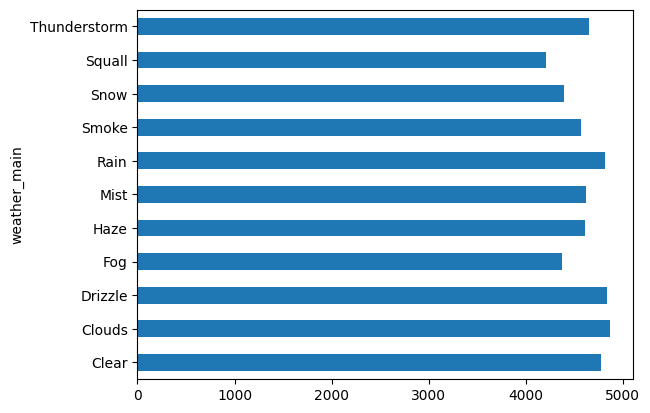

In [55]:
weather_traffic = by_weather_main['traffic_volume'].plot.barh()

<Axes: ylabel='weather_description'>

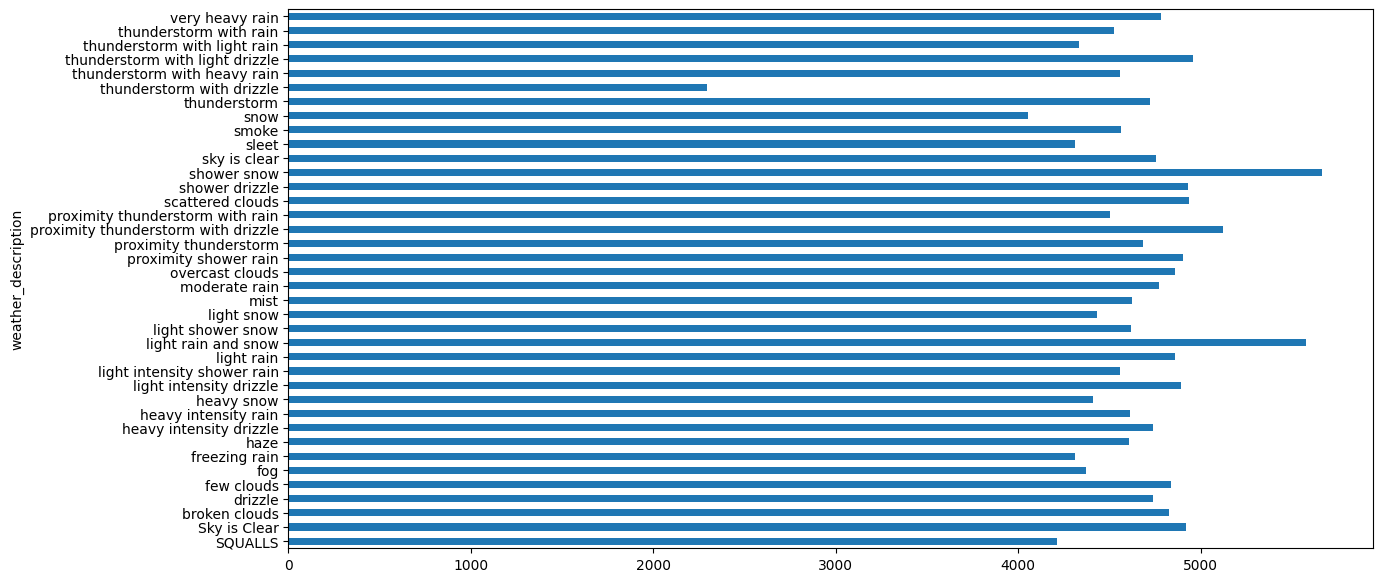

In [56]:
by_weather_description['traffic_volume'].plot.barh(figsize=(14, 7))

## Identifying Heavy Traffic Indicators  

Analyzing the bar plots, it is evident that some weather conditions are associated with traffic volumes exceeding 5,000 vehicles. Specifically, in the **weather_main** category, conditions such as "Clear," "Clouds," "Drizzle," and "Fog" appear to have higher traffic volumes, approaching or exceeding this threshold.  

In the **weather_description** category, a few specific conditions like "shower snow," "light snow," and "light rain" also show relatively high traffic volumes. However, there is no single extreme weather condition, such as thunderstorms or heavy snow, that stands out as a strong indicator of high traffic. Instead, moderate weather conditions, particularly those related to clearer skies or light precipitation, tend to correspond with increased traffic volume.  

These findings suggest that adverse weather conditions may slightly reduce traffic volume, while stable or mild weather conditions are more likely to be associated with higher traffic flow.  

## Conclusion  

The analysis of I-94 traffic data reveals that traffic volume is significantly higher on business days compared to weekends, with peak hours occurring during typical commuting times. Time of day plays a crucial role, as daytime traffic is consistently heavier than nighttime traffic.  

Weather conditions, based on both numerical and categorical variables, show minimal impact on traffic volume. While rain exhibits a moderate correlation, other factors such as snow, temperature, and cloud cover have little to no influence. Additionally, clearer weather conditions tend to coincide with higher traffic volumes, but no extreme weather type strongly indicates heavy traffic.  

Overall, the primary drivers of traffic volume appear to be work-related travel patterns rather than weather conditions.  